<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

Pre-Owned cars business is one of the most trending businesses in recent years

Since there are many pre-owned car companies out there, it is quite important to analyze and be aware of current trends and customers' preferences on the pre-owned cars to be on the top

---
<a name = Section2></a>
# **2. Problem Statement**
---

  - Cars Absolute, an American company buys and sells second hand cars.

  - The company has earned its name because of sincerity in work and quality of services.

  - But for past few months their sales is down for some reason and they are unable to figure it out.

  - To tackle this problem they hired a genius team of data scientists. Consider you are one of them...

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [1]:
!pip install -q datascience                                         
!pip install -q pandas-profiling    
print("Installation Done")

Installation Done


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling        
!pip install plotly --upgrade
print("Installation Done")

Requirement already up-to-date: plotly in c:\users\goty\anaconda3\lib\site-packages (4.14.3)
Installation Done


### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)    

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
import os
#-------------------------------------------------------------------------------------------------------------------------------

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [4]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', data.shape)

data.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### **Data Description**



In [5]:
data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


### **Data Information**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 523.8+ KB


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---


In [7]:
profile=ProfileReport(data,title='Cars Absolute Profiling before Data Preprocess', progress_bar=False, minimal=True)
profile.to_file(output_file='Cars_Absolute_Profiling_before_Data_preprocess.html')
os.getcwd()

'C:\\Users\\GOTY'

 # 5.1 Cars Absolute profiling observation - before Data pre-processing

Total No. of Columns - 10

Categorical - 6
 - Car
 - Body
 - engType
 - Model
 - Type
 - engV is though mentioned as numerical, it is basically a Categorical column. It just gives the version. 
 
Numerical - 3
 - price
 - mileage
 - year

 
Boolean - 1
 - Registration
 
1. Car has no missing Values
2. Price is Right skewed. 267 rows (2.8%) has 0 price and hence during pre-processing Median can be used based on 'car, body and engineType'
3. Body has no missing and 6 distinct values
4. Mileage is Right skewed. 348 rows (3.6%) has 0 mileage and hence during pre-processing Median can be used based on the car grouping (say by car and body columns)
5. engV has 434 missing values. Not a prominent column so can be defaulted.
6. engType has no missing and 4 distinct values
7. Registration is boolean and has no missing values. 6% of unregistered cars
8. Year has no missing data
9. Model has no missing data and 888 distinct values
10. Drive has 511 missing values. We can figure out by looking at similar type of cars
11. In 'body' column there is a typo - Instead of 'Wagon' it has been mistyped as 'Vagon'

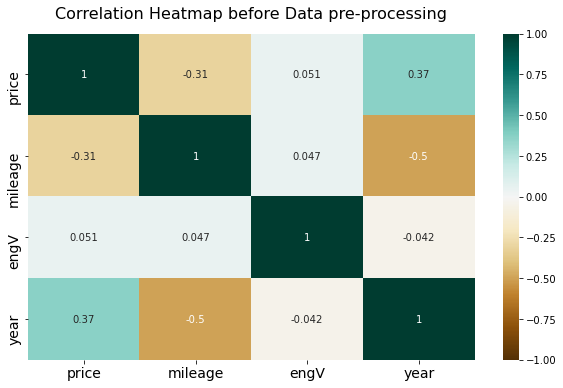

In [8]:
data.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap before Data pre-processing', fontdict={'fontsize':16}, pad=15)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 14)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 14)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [9]:
# Exporting the original Data
data.to_excel('Cars_Absolute.xlsx')

# Replacing price which has Value=0
data['price'].replace(0,np.nan,inplace=True)
data['price'].fillna(data.groupby(['car','body','engType'])['price'].transform('median'),inplace=True)
data['price'].fillna(data.groupby(['car','year'])['price'].transform('median'),inplace=True)
data['price'].fillna(data.groupby(['car'])['price'].transform('median'),inplace=True)

# Replacing mileage which has value=0
data['mileage'].replace(0,np.nan,inplace=True)
data['mileage'].fillna(data.groupby(['car','body','engType'])['mileage'].transform('median'),inplace=True)
data['mileage'].fillna(data.groupby(['car','body'])['mileage'].transform('median'),inplace=True)

# Replacing engine Version - Defaulting to 99.99 as the original data also has this defaulted value
data['engV'].fillna(99.99,inplace=True)

# Replacing drive which has NaN values
data['drive']=data.groupby(['car','body','year','model'])['drive'].ffill()
data['drive']=data.groupby(['car','body','year','model'])['drive'].bfill()
data['drive']=data.groupby(['car','body','model'])['drive'].ffill()
data['drive']=data.groupby(['car','body','model'])['drive'].bfill()
data['drive']=data.groupby(['car','body','year'])['drive'].ffill()
data['drive']=data.groupby(['car','body','year'])['drive'].bfill()
data['drive']=data.groupby(['car','body'])['drive'].ffill()
data['drive']=data.groupby(['car','body'])['drive'].bfill()
data['drive']=data.groupby(['body'])['drive'].ffill()
data['drive']=data.groupby(['body'])['drive'].bfill()
data.drop(data[data['price'].isna()].index, inplace = True)

data.to_excel("Cars_Absolute_1.xlsx")

In [10]:
# Find the number of unique car brands
data['car'].nunique()

86

In [11]:
# Find the number of unique body
data['body'].nunique()

6

In [12]:
# Find the number of unique engine Type
data['engType'].nunique()

4

In [13]:
# Find the number of unique drives
data['drive'].nunique()

3

In [14]:
# Find the number of unique models per car brand
car_models=pd.DataFrame(data.groupby('car')['model'].nunique())
car_models

,model
car,
Acura,5
Alfa Romeo,6
Aro,1
Aston Martin,2
Audi,20
...,...
Volvo,10
Wartburg,1
ZAZ,10


In [15]:
# Fetching the Year data
year=data['year'].sort_values().unique()
print(year)

[1953 1958 1959 1961 1962 1963 1964 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


In [16]:
# Find the number of year values
data['year'].nunique()

56

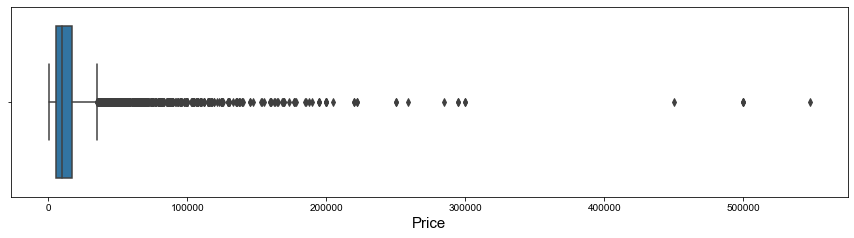

In [17]:
# Visualizing the Price Outliers using seaborn.boxplot
fig_dims=(15,3.5)
fig, ax1 = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
ax2 = sns.boxplot(x='price', data=data)
ax2.set_xlabel("Price")
ax2. xaxis. label. set_size(15)
#ax.set(xlim=(100,600000))

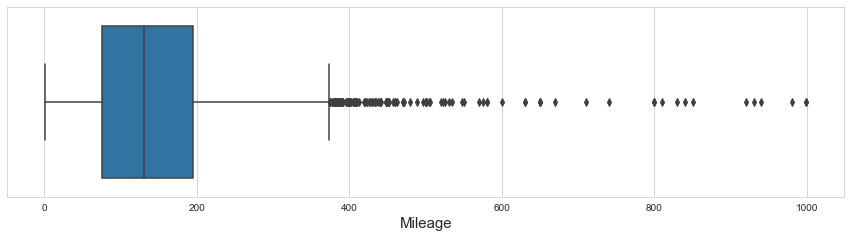

In [18]:
# Visualizing the Mileage Outliers using seaborn.boxplot
fig_dims=(15,3.5)
fig, ax1 = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
ax2 = sns.boxplot(x='mileage', data=data)
ax2.set_xlabel("Mileage")
ax2. xaxis. label. set_size(15)

In [19]:
data.corr()

,price,mileage,engV,year
price,1.000000,-0.282002,0.015679,0.387572
mileage,-0.282002,1.000000,-0.035527,-0.460309
engV,0.015679,-0.035527,1.000000,-0.008936
year,0.387572,-0.460309,-0.008936,1.000000


In [20]:
# Finding number of records with >24000
data[(data['price']>24000) | (data['price']<1000)]['car'].count()
# These rows can be dropped which can be considered as Price outliers

1581

In [21]:
# Finding number of records with mileage >380
data[(data['mileage']>380)]['car'].count()

168

In [22]:
data2=data[(data['price']>=1000) & (data['price']<=24000)] 
data2

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83.0,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199.0,2.0,Petrol,yes,2003,Accord,front
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140.0,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150.0,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180.0,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150.0,3.5,Gas,yes,2008,ES 350,front


In [23]:
# Filtering out the Price and Mileage Outliers based on the Seaborn Box plot 
data3=data[((data['price']>=1000) & (data['price']<=24000)) & ((data['mileage']<=360))] 
data3

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83.0,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199.0,2.0,Petrol,yes,2003,Accord,front
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140.0,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150.0,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180.0,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150.0,3.5,Gas,yes,2008,ES 350,front


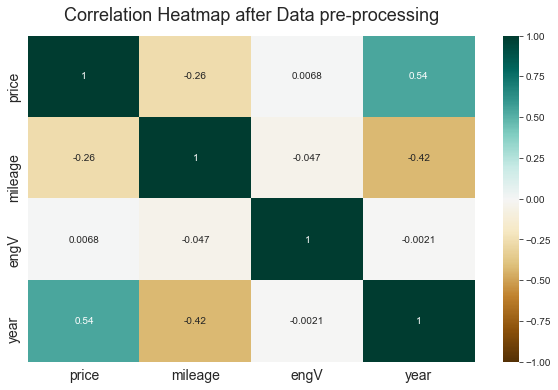

In [24]:
data3.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data3.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap after Data pre-processing', fontdict={'fontsize':18}, pad=15)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 14)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 14)
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

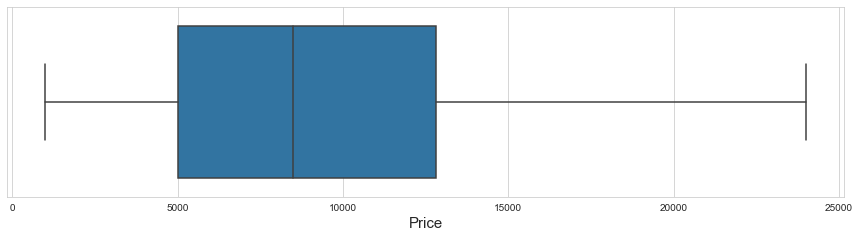

In [25]:
# Visualizing the Price Outliers using seaborn.boxplot after Data pre-processing
fig_dims=(15,3.5)
fig, ax1 = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
ax2 = sns.boxplot(x='price', data=data3)
ax2.set_xlabel("Price")
ax2. xaxis. label. set_size(15)
# No Outliers

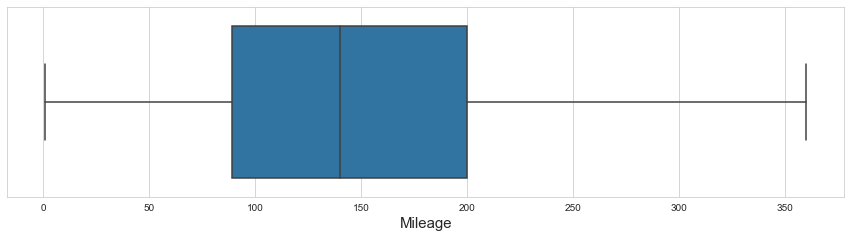

In [26]:
# Visualizing the Mileage Outliers using seaborn.boxplot after Data pre-processing
fig_dims=(15,3.5)
fig, ax1 = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")
ax2 = sns.boxplot(x='mileage', data=data3)
ax2.set_xlabel("Mileage")
ax2. xaxis. label. set_size(15)
# No Outliers

---
<a name = Section7></a>
# **7. Data Post-Profiling**


In [27]:
profile=ProfileReport(data3,title='Cars Absolute Profiling post Data Preprocess', progress_bar=False, minimal=True)
profile.to_file(output_file='Cars_Absolute_Profiling_after_Data_preprocess.html')
os.getcwd()

'C:\\Users\\GOTY'

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

We will be using the derived data set (where the outliers have been filtered - only for price and mileage analysis), for the rest of the analysis we would be doing on the original data set

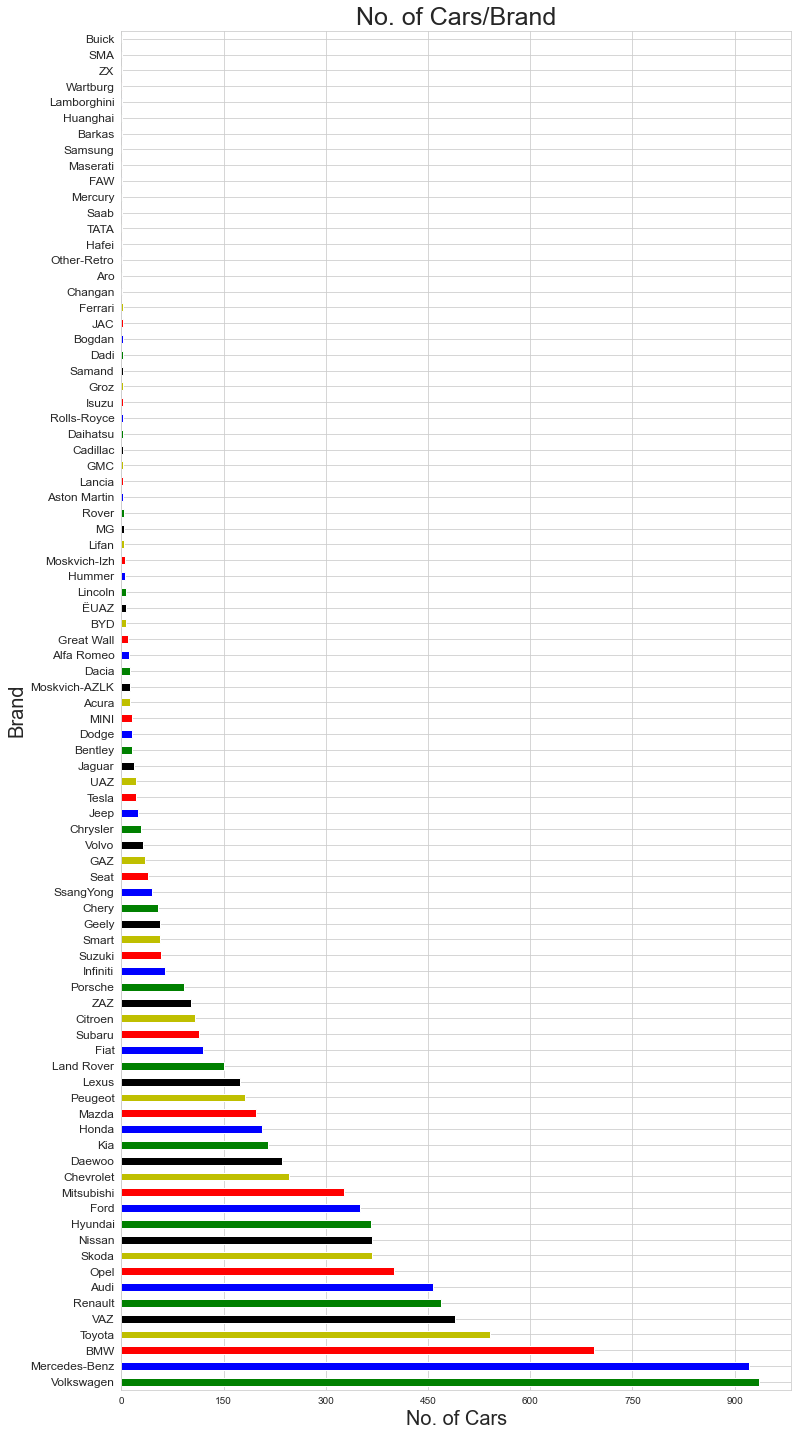

In [28]:
# No. of cars per brand 
ax = data['car'].value_counts().plot(kind='barh',
                                    color=tuple(["g", "b","r","y","k"]),
                                    xticks=np.arange(0,1000,150),
                                    figsize=(12,25),
                                    title="No. of Cars/Brand",stacked=True)
ax.set_ylabel("Brand")
ax.set_xlabel("No. of Cars")
ax. title. set_size(25)
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
#ax.set_yticklabels(yvalues, Fontsize=15)
plt.yticks(fontsize=12)
plt.show()

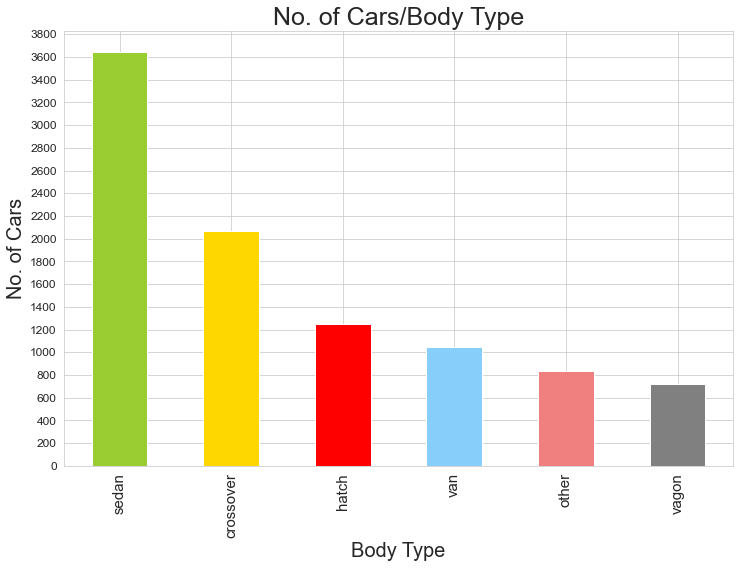

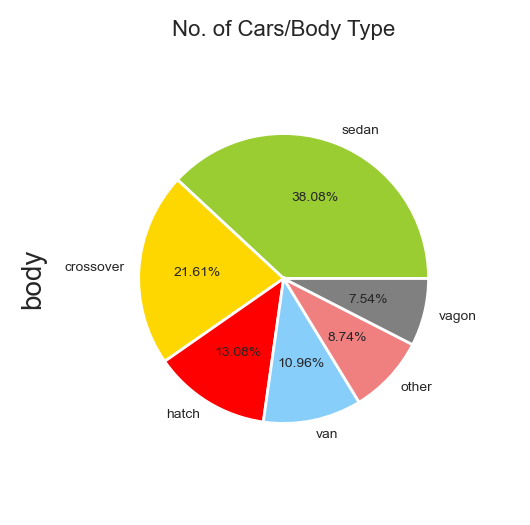

In [29]:
# No. of cars per body type
colors = ['yellowgreen', 'gold', 'red', 'lightskyblue', 
          'lightcoral','grey','yellow','peachpuff','lightsalmon','cyan']
ax = data['body'].value_counts().plot(kind='bar',
                                    color= colors,
                                    yticks=np.arange(0,4000,200),
                                    figsize=(12,8),
                                    title="No. of Cars/Body Type",stacked=True)
ax.set_ylabel("No. of Cars")
ax.set_xlabel("Body Type")
ax. title. set_size(25)
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
#ax.set_yticklabels(yvalues, Fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

fig = plt.figure(figsize=(3,3), dpi=200)

plot = data['body'].value_counts().plot.pie(legend=False,autopct='%.2f%%',textprops={'fontsize': 5},shadow=False,\
                    colors=colors, startangle=0,radius=0.8)
plt.title('No. of Cars/Body Type', fontsize=8)
plt.show()

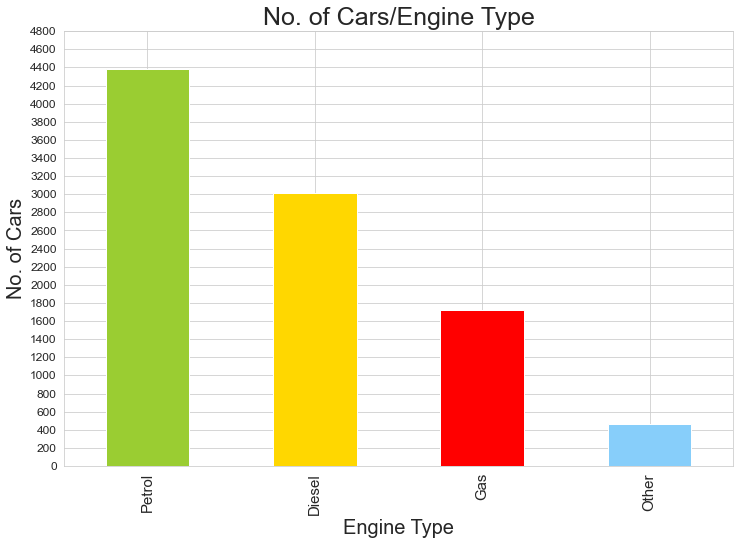

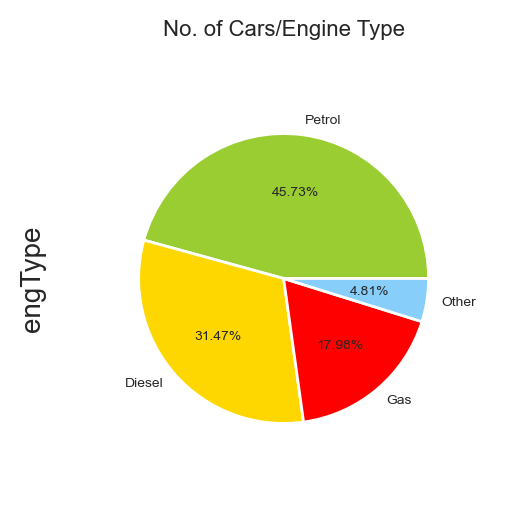

In [30]:
# No. of cars per engine type
ax = data['engType'].value_counts().plot(kind='bar',
                                    color= colors,
                                    yticks=np.arange(0,5000,200),
                                    figsize=(12,8),
                                    title="No. of Cars/Engine Type",stacked=True)
ax.set_ylabel("No. of Cars")
ax.set_xlabel("Engine Type")
ax. title. set_size(25)
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
#ax.set_yticklabels(yvalues, Fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

fig = plt.figure(figsize=(3,3), dpi=200)
plot = data['engType'].value_counts().plot.pie(legend=False,autopct='%.2f%%',textprops={'fontsize': 5},shadow=False,\
                    colors=colors, startangle=0,radius=0.8)
plt.title('No. of Cars/Engine Type', fontsize=8)
plt.show()

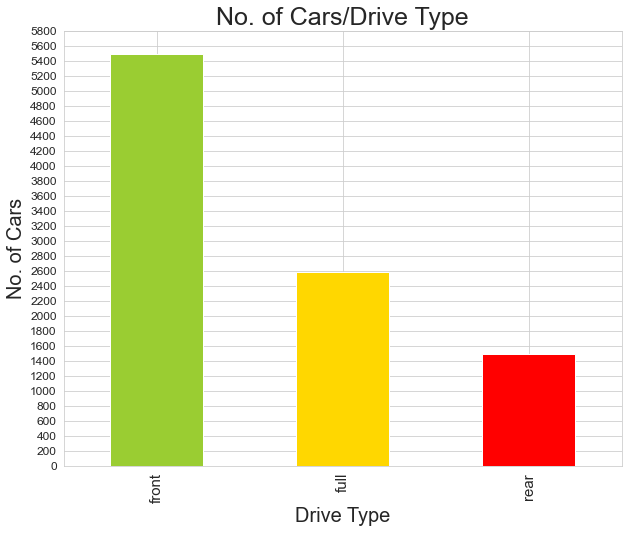

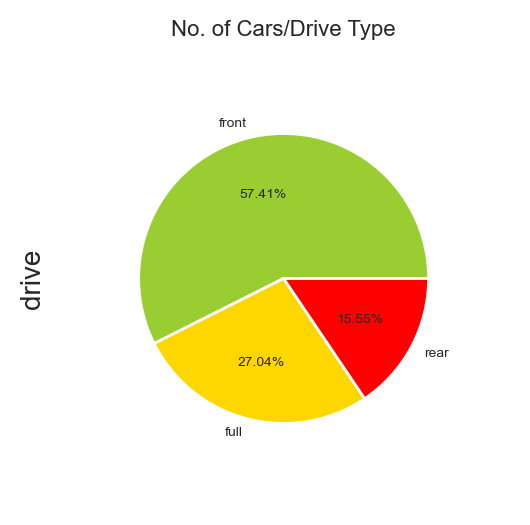

In [31]:
# No. of cars per drive type
ax = data['drive'].value_counts().plot(kind='bar',
                                    color= colors,
                                    yticks=np.arange(0,6000,200),
                                    figsize=(10,8),
                                    title="No. of Cars/Drive Type",stacked=True)
ax.set_ylabel("No. of Cars")
ax.set_xlabel("Drive Type")
ax. title. set_size(25)
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
#ax.set_yticklabels(yvalues, Fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

fig = plt.figure(figsize=(3,3), dpi=200)
plot = data['drive'].value_counts().plot.pie(legend=False,autopct='%.2f%%',textprops={'fontsize': 5},shadow=False,\
                    colors=colors, startangle=0,radius=0.8)
plt.title('No. of Cars/Drive Type', fontsize=8)
plt.show()

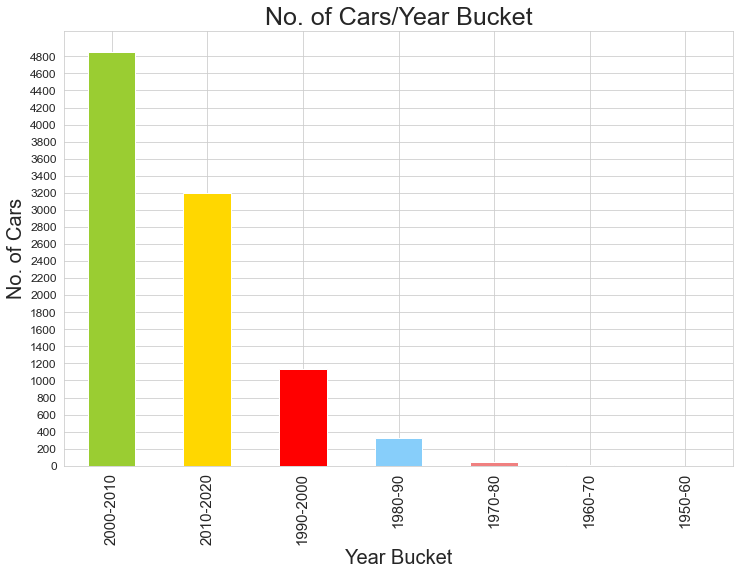

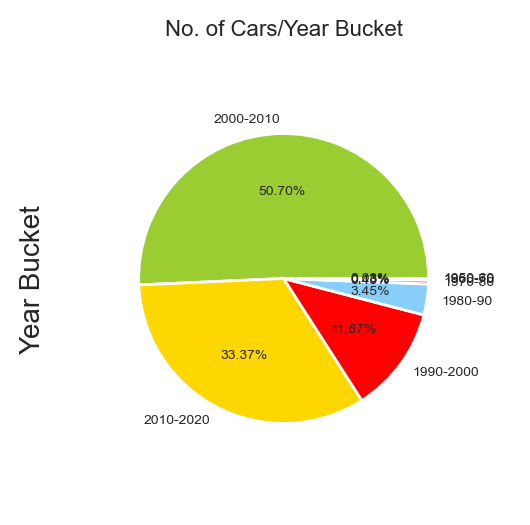

In [32]:
# Bucketing the Year data and plotting the No. of Cars/Year Bucket
data['Year Bucket'] = pd.cut(data['year'],[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]\
                             , precision=0, labels=["1950-60", "1960-70", "1970-80", "1980-90"\
                                                    , "1990-2000", "2000-2010", "2010-2020"])

ax = data['Year Bucket'].value_counts().plot(kind='bar',
                                    color= colors,
                                    yticks=np.arange(0,5000,200),
                                    figsize=(12,8),
                                    title="No. of Cars/Year Bucket",stacked=True)
ax.set_ylabel("No. of Cars")
ax.set_xlabel("Year Bucket")
ax. title. set_size(25)
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
#ax.set_yticklabels(yvalues, Fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

fig = plt.figure(figsize=(3,3), dpi=200)
plot = data['Year Bucket'].value_counts().plot.pie(legend=False,autopct='%.2f%%',textprops={'fontsize': 5},shadow=False,\
                    colors=colors, startangle=0,radius=0.8)
plt.title('No. of Cars/Year Bucket', fontsize=8)
plt.show()

In [33]:
# Find the min and max price for Bucketing
price_min=data3['price'].min()
price_max=data3['price'].max()
print("Minimum Price = {} |  Maximum Price = {}".format(price_min,price_max))

Minimum Price = 1000.0 |  Maximum Price = 24000.0


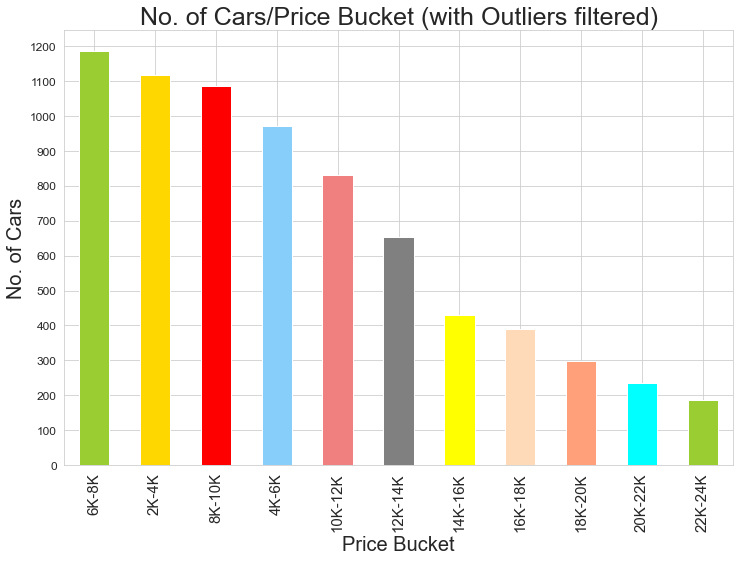

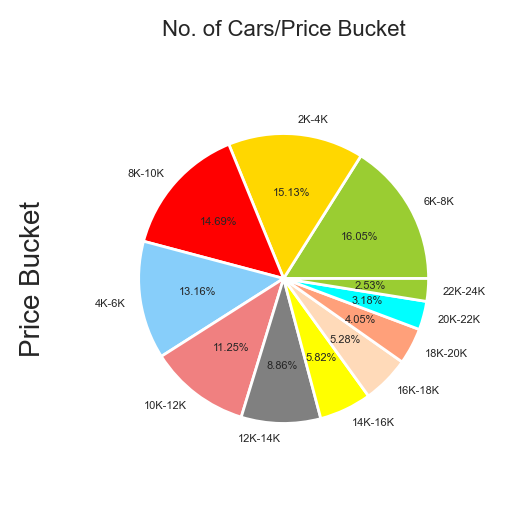

In [34]:
# Bucketing the Price data and plotting the No. of Cars/Price Bucket
data3['Price Bucket'] = pd.cut(data3['price'],[2000, 4000, 6000, 8000, 10000, 12000, 14000,\
                                               16000, 18000, 20000, 22000, 24000]\
                             , precision=0, labels=["2K-4K", "4K-6K", "6K-8K", "8K-10K",\
                                                    "10K-12K", "12K-14K", "14K-16K",\
                                                    "16K-18K", "18K-20K", "20K-22K", "22K-24K"])

ax = data3['Price Bucket'].value_counts().plot(kind='bar',
                                    color= colors,
                                    yticks=np.arange(0,1300,100),
                                    figsize=(12,8),
                                    title="No. of Cars/Price Bucket (with Outliers filtered)",stacked=True)
ax.set_ylabel("No. of Cars")
ax.set_xlabel("Price Bucket")
ax. title. set_size(25)
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
#ax.set_yticklabels(yvalues, Fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

fig = plt.figure(figsize=(3,3), dpi=200)
plot = data3['Price Bucket'].value_counts().plot.pie(legend=False,autopct='%.2f%%',textprops={'fontsize': 4},shadow=False,\
                    colors=colors, startangle=0,radius=0.8)
plt.title('No. of Cars/Price Bucket', fontsize=8)
plt.show()

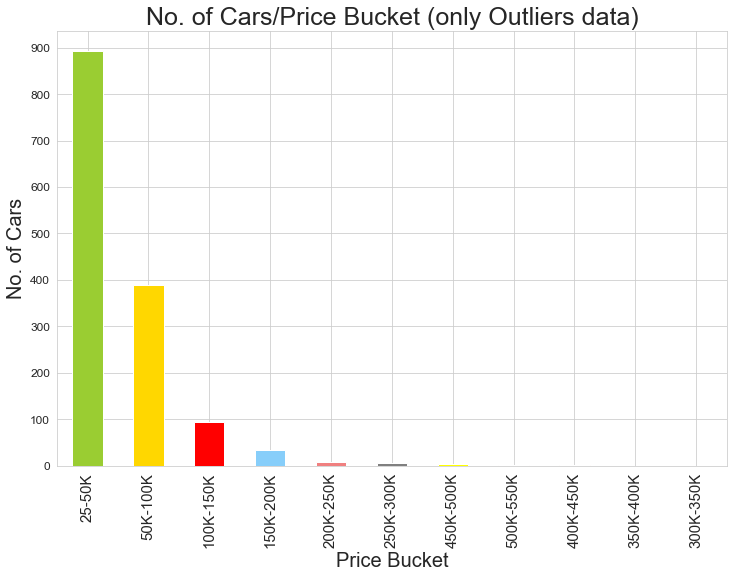

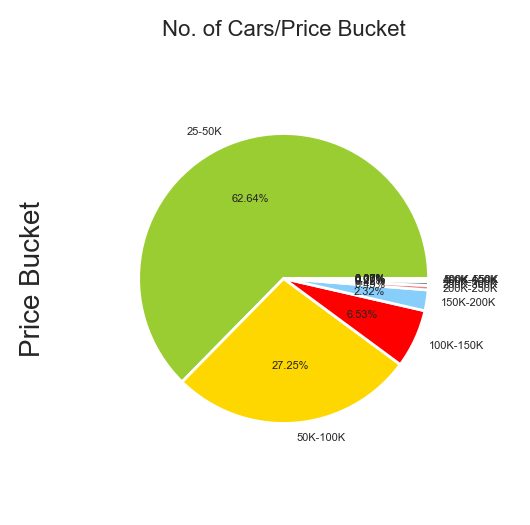

In [35]:
# Bucketing the Price data and plotting the No. of Cars/Price Bucket
data['Price Bucket'] = pd.cut(data['price'],[25000,50000,100000,150000,200000,250000,
                                             300000,350000,400000,450000,500000,550000]\
                             , precision=0, labels=["25-50K", "50K-100K", "100K-150K", "150K-200K",\
                                                    "200K-250K", "250K-300K", "300K-350K",\
                                                    "350K-400K", "400K-450K", "450K-500K", "500K-550K"])

ax = data['Price Bucket'].value_counts().plot(kind='bar',
                                    color= colors,
                                    yticks=np.arange(0,1000,100),
                                    figsize=(12,8),
                                    title="No. of Cars/Price Bucket (only Outliers data)",stacked=True)
ax.set_ylabel("No. of Cars")
ax.set_xlabel("Price Bucket")
ax. title. set_size(25)
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
#ax.set_yticklabels(yvalues, Fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

fig = plt.figure(figsize=(3,3), dpi=200)
plot = data['Price Bucket'].value_counts().plot.pie(legend=False,autopct='%.2f%%',textprops={'fontsize': 4},shadow=False,\
                    colors=colors, startangle=0,radius=0.8)
plt.title('No. of Cars/Price Bucket', fontsize=8)
plt.show()

In [36]:
# Find the min and max mileage for Bucketing
mlg_min=data3['mileage'].min()
mlg_max=data3['mileage'].max()
print("Minimum Mileage = {} |  Maximum Mileage = {}".format(mlg_min,mlg_max))

Minimum Mileage = 1.0 |  Maximum Mileage = 360.0


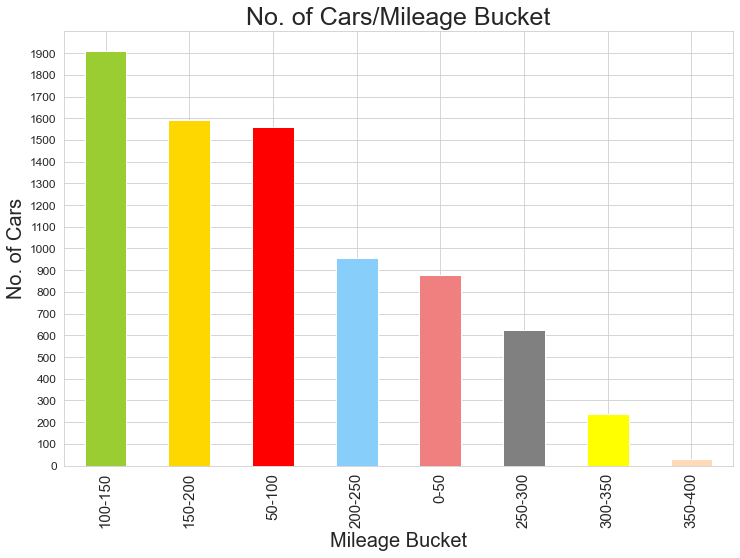

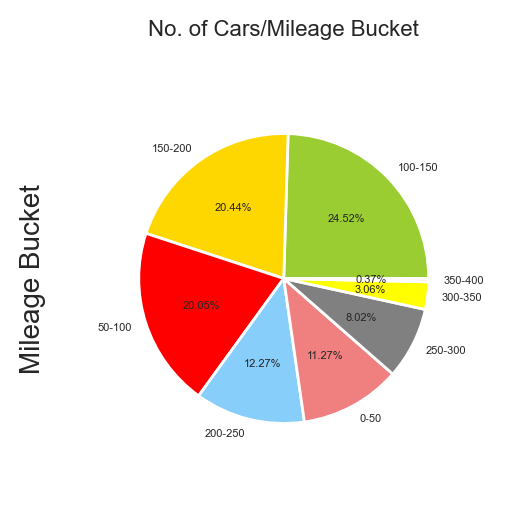

In [37]:
# Bucketing the Mileage data and plotting the No. of Cars/Mileage Bucket
data3['Mileage Bucket'] = pd.cut(data3['mileage'],[0, 50, 100, 150, 200, 250, 300, 350, 400]\
                             , precision=0, labels=["0-50", "50-100", "100-150", "150-200", "200-250",\
                                                    "250-300", "300-350", "350-400"])
ax = data3['Mileage Bucket'].value_counts().plot(kind='bar',
                                    color= colors,
                                    yticks=np.arange(0,2000,100),
                                    figsize=(12,8),
                                    title="No. of Cars/Mileage Bucket",stacked=True)
ax.set_ylabel("No. of Cars")
ax.set_xlabel("Mileage Bucket")
ax. title. set_size(25)
ax. xaxis. label. set_size(20)
ax. yaxis. label. set_size(20)
#ax.set_yticklabels(yvalues, Fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

fig = plt.figure(figsize=(3,3), dpi=200)
plot = data3['Mileage Bucket'].value_counts().plot.pie(legend=False,autopct='%.2f%%',textprops={'fontsize': 4},shadow=False,\
                    colors=colors, startangle=0,radius=0.8)
plt.title('No. of Cars/Mileage Bucket', fontsize=8)
plt.show()

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**



1. Mercedes, Volkswagen and BMW brand count is more compared to budget wise and fuel wise economical car brands like Honda, Renault, Hyundai, Ford, Fiat, Kia, Nissan, Toyota
2. Sedan count is more compared to that of crossover (SUV),hatch, van and wagon
3. Petrol Cars seems to be more in volume compared to that of the others
4. Other- may be Electric Car volume is quite low
5. Rear Wheel Drive cars volume seems to be very less compared to Front Wheel Drive (only 15% of RWD cars are there)
6. The volume of 2010-2020 year car is less than that of the previous year bucket
7. The volume of cars in 25K-50K and 50K-100K price range is quite high

<a name = Section92></a>
### **9.2 Actionable Insights**

To improve the Sales, the company shall consider the following actionable insights:

1. Car brands such as Honda, Renault, Hyundai, Ford, Fiat, Kia, Nissan, Toyota have more variants starting from basic model to flagships.
The Company can try to increase the volume of those brands.

2. Since crossover and wagon are trendy styles, the Company can try to increase the volume of crossover and wagon type cars.
3. They can also slightly increase the volume of  hatch and van 
4. Since Diesel and Electric cars are more economical, the Company can try to increase the volume of Diesel and Electric Cars.
5. Rear Wheel Drive cars volume seems to be very less compared to Front Wheel Drive.

   Despite the fact that Front WD cars give more mileage, handling the vehicle around corners and curves isn’t as strong as    RWD cars, especially at faster speeds and on windy roads.
   
   RWD are also better for towing and for people who use to carry more loads.
   
   So increase the volume of RWD cars and Full Wheel drive cars as well.
6. The company shall try increasing the volume of 2010-2020 year bucket cars, especially 2015-2020 as customers would prefer recent year cars.

7. They can try to slightly increase the volume of Vintage or retro cars 
8. The company shall try bringing down the prices which are in 30K-50 K range & more than 50K range which fall under the Outliers data. In general, considering 70K-100K range, people will start looking out for Brand new cars rather preowned.
9. Increase the volume of 20-50 & 50-100 bucket mileage cars and slightly reduce the volume of 250-300 bucket mileage cars.